<h1>Predicting Boston Housing Prices</h1>

<p> </p>
<h2>Getting Started</h2>
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:



In [220]:
import os
import pandas as pd
import numpy as np
import json
import random
import re
from pprint import pprint
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
from plotly import subplots
import plotly.express as px
import plotly.io as pio

from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

from datetime import date, datetime, timedelta
import time, re, os

import numpy as np
from math import atan2
from numpy import cos, sin, conjugate, sqrt
import pandas as pd
from scipy.interpolate import Rbf
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_random_state



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from math import sqrt
from matplotlib import cm
from scipy.stats.stats import pearsonr
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



os.listdir()
os.listdir()

['.ipynb_checkpoints',
 'BostonHousingReg.pkl',
 'Boston_housing-Copy1.ipynb',
 'Boston_housing.ipynb',
 'housing.csv',
 'housing.data',
 'housing.names',
 'temp-plot.html']

In [221]:
with open('housing.names') as file:
    data=file.readlines()
lst=[]
for i in data[30:47]:
    list_elements=(i.replace('s+', ''))
    pprint(list_elements)
    elements=(re.findall(('\.\s+\w+'), list_elements))
    lst.extend((elements))
col=list(map(lambda x: x.replace('s+', '').replace('.', ''), lst))
with open('housing.data', 'rt') as file:
    data=file.read()
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
df_data=pd.read_csv(StringIO(data), sep='\s+', header=None)
df_data.columns=col


'    1. CRIM      per capita crime rate by town\n'
'    2. ZN        proportion of residential land zoned for lots over \n'
'                 25,000 sq.ft.\n'
'    3. INDUS     proportion of non-retail business acres per town\n'
'    4. CHAS      Charles River dummy variable (= 1 if tract bounds \n'
'                 river; 0 otherwise)\n'
'    5. NOX       nitric oxides concentration (parts per 10 million)\n'
'    6. RM        average number of rooms per dwelling\n'
'    7. AGE       proportion of owner-occupied units built prior to 1940\n'
'    8. DIS       weighted distances to five Boston employment centres\n'
'    9. RAD       index of accessibility to radial highways\n'
'    10. TAX      full-value property-tax rate per $10,000\n'
'    11. PTRATIO  pupil-teacher ratio by town\n'
'    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks \n'
'                 by town\n'
'    13. LSTAT    % lower status of the population\n'
"    14. MEDV     Median value of owner-occu

In [222]:

df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [223]:
subplot_row=int(len(df_data.columns)/2)
subplot_col= 2
col=df_data.columns
fig=make_subplots(rows=subplot_row, cols=subplot_col, subplot_titles=(df_data.columns), 
                  #row_heights=[5]*subplot_row, 
                  shared_xaxes=False, 
                    vertical_spacing=0.1
)
index=0
for i in range(subplot_row):
    
    for j in range(subplot_col):
        
        
        
        templatep='none'          
        fig.add_trace(go.Histogram(x=df_data[col[index]], showlegend=True,
                                name=[col[index]][0]),  row=i+1, col=j+1)
        
        
        fig.update_layout( title_text='Histograms', template=templatep, height=1350)
        fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)  
                                   
        fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        fig.update_yaxes(title_text='Counts',showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        index+=1

            
            
fig.show()

In [224]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    CRIM     506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    float64
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [225]:
from plotly import subplots
import numpy as np
from sklearn.metrics import r2_score
subplot_row=int(len(df_data.columns)/2)
subplot_col= 2
col=df_data.columns
col=[i.strip() for i in col]
df_data.columns=col
subplot_title=['MEDV vs. '+i for i in col]
fig=make_subplots(rows=subplot_row, cols=subplot_col, subplot_titles=subplot_title, 
                  #row_heights=[5]*subplot_row, 
                  shared_xaxes=False, 
                    vertical_spacing=0.1
)


index=0
for i in range(subplot_row):
    for j in range(subplot_col):
        order=1
        
        p = np.polyfit(x=df_data[col[index]], y=df_data["MEDV"], deg=order, full=True)
        f = np.poly1d(p[0])

# calculate new x's and y's

        y_new = f(df_data[col[index]])
        
        R2=np.round(r2_score(df_data["MEDV"], y_new), 2)
        
        
        templatep='none'          
        fig.add_trace(go.Scatter(x=df_data[col[index]], y=df_data["MEDV"], mode='markers', showlegend=True,
                                name=[col[index]][0]),  row=i+1, col=j+1)
        fig.add_trace(go.Scatter(x=df_data[col[index]], y=y_new, mode='lines', showlegend=False,
                                name=[col[index]][0], text='R<sup>2</sup>:'+str(R2)),  row=i+1, col=j+1)
        fig.update_layout( title_text='Linear Fit Scatter Plots', showlegend=True, template=templatep, height=1500
                                   )
        fig.update_xaxes(title_text=([col[index]][0]), showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across",  row=i+1, col=j+1)
        fig.update_yaxes(title_text='MEDV',showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        index+=1
            
fig.show()

In [226]:
from sklearn.preprocessing import QuantileTransformer
scq=QuantileTransformer(output_distribution='normal', random_state=21)
df_transformed=scq.fit_transform(df_data)
df_transformed=pd.DataFrame(df_transformed, columns=col)

subplot_row=int(len(df_transformed.columns)/2)
subplot_col= 2
col=df_transformed.columns
fig=make_subplots(rows=subplot_row, cols=subplot_col, subplot_titles=(df_data.columns), 
                  #row_heights=[5]*subplot_row, 
                  shared_xaxes=False, 
                    vertical_spacing=0.1
)
index=0
for i in range(subplot_row):
    
    for j in range(subplot_col):
        
        
        
        templatep='none'          
        fig.add_trace(go.Histogram(x=df_transformed[col[index]], showlegend=True,
                                name=[col[index]][0]),  row=i+1, col=j+1)
        
        
        fig.update_layout( title_text='Normal Transformed Histograms', template=templatep, height=1350)
        fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)  
                                   
        fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        fig.update_yaxes(title_text='Counts',showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        index+=1

            
            
fig.show()




In [227]:
#finding out percent points greter than Z-score of 3
percent_greater=np.round(((np.greater_equal(abs(df_transformed), 3)).sum())*100/len(df_transformed), 2)

Greater_df = pd.DataFrame({'column_name': df_transformed.columns,
                                 'GreaterThan3': percent_greater}).sort_values('GreaterThan3', ascending=False)

template="plotly"


fig = px.bar(Greater_df,
                     x="column_name", y="GreaterThan3", color="column_name",
                     text=Greater_df['GreaterThan3'],
                     template=template, title="Percent of columns with Zscore greater than three by column name")


fig.show()

Dropping columns ZN, RAD, B, AGE as most of the Z-values are greater than 3. Also dropping CHAS as most houses are with a river.

In [228]:
mask=np.less_equal(abs(df_transformed['MEDV']), 3)
df_data=df_data[mask]
df_data.drop(columns=['CHAS', 'ZN', 'RAD', 'B', 'AGE'], axis=1, inplace=True)
df_data.head()

,CRIM,INDUS,NOX,RM,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,4.0900,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,4.9671,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,4.9671,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,6.0622,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,6.0622,222.0,18.7,5.33,36.2


In [22]:
mask=np.less_equal(abs(df_transformed['MEDV']), 3)
#df_transformed.head()
df_transformed=df_transformed[mask]
df_transformed.drop(columns=['CHAS', 'ZN', 'RAD', 'B', 'AGE'], axis=1, inplace=True)

fig = go.Figure(
        go.Heatmap(
            z=np.greater_equal(abs(df_transformed), 3).astype(int),
            x=df_transformed.columns,
            y=df_transformed.index.values,
            colorscale='Greys',
            reversescale=True,
            showscale=False))

fig.update_layout(
    title={'text': 'Zscore greater than 3 values Matrix',
             'y':0.95, 'x':0.5,
            'xanchor': 'center', 'yanchor': 'top'},
    xaxis=dict(tickangle=45, title='Columns'),
    yaxis=dict(range=[np.max(df_transformed.index.values), np.min(df_transformed.index.values)], title='Row Index'),
    )
fig.show()

In [23]:
maskdf=np.less_equal(abs(df_transformed), 3)
df_data=(df_data[maskdf].dropna(axis=0))
df_data.head()

,CRIM,INDUS,NOX,RM,DIS,TAX,PTRATIO,LSTAT,MEDV
1,0.02731,7.07,0.469,6.421,4.9671,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,4.9671,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,6.0622,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,6.0622,222.0,18.7,5.33,36.2
5,0.02985,2.18,0.458,6.430,6.0622,222.0,18.7,5.21,28.7


In [24]:
#Ten highest correlation
from scipy.stats.stats import pearsonr
import seaborn as sns
correlation=(df_data.corr(method='pearson'))
(correlation.nlargest(10,  df_transformed.columns)).iloc[:, -1]

CRIM      -0.480079
TAX       -0.569228
NOX       -0.535272
LSTAT     -0.759440
INDUS     -0.586792
PTRATIO   -0.593883
RM         0.713690
DIS        0.343154
MEDV       1.000000
Name: MEDV, dtype: float64

In [25]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary=pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary=summary.reset_index()
    summary['Name']=summary['index']
    summary=summary[['Name', 'dtypes']]
    summary['Missing']=df.isnull().sum().values
    summary['Unique']=df.nunique().values
    for name in summary['Name']:
        summary.loc[summary['Name'] == name, 'Mean'] = round(np.mean(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Sigma'] = round(np.std(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Minimum'] = round(np.min(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Maximum'] = round(np.max(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Median'] = round(np.median(df[name]), 2)
    return summary
resumetable(df_data)

Dataset Shape: (455, 9)


,Name,dtypes,Missing,Unique,Mean,Sigma,Minimum,Maximum,Median
0,CRIM,float64,0,454,3.35,7.28,0.01,73.53,0.23
1,INDUS,float64,0,69,10.70,6.49,0.74,25.65,8.56
2,NOX,float64,0,76,0.54,0.10,0.39,0.77,0.52
3,RM,float64,0,404,6.28,0.61,3.86,8.40,6.21
4,DIS,float64,0,367,3.88,2.00,1.17,10.71,3.38
5,TAX,float64,0,60,403.39,167.89,188.00,666.00,313.00
6,PTRATIO,float64,0,41,18.65,1.97,13.00,21.20,19.10
7,LSTAT,float64,0,413,12.61,6.80,1.98,36.98,11.38
8,MEDV,float64,0,221,21.93,7.83,5.60,48.80,21.20


In [28]:
#Box plots, Deciding the Median house price in Low and high groups based on the Median house value
mask_low=(df_data['MEDV']<21.2)
mask_high=(df_data['MEDV']>=21.2)
df_data['MEDV_DIVIDE']=0
df_data['MEDV_DIVIDE'][mask_low]='LOW'
df_data['MEDV_DIVIDE'][mask_high]='HIGH'

df_data.head()


,CRIM,INDUS,NOX,RM,DIS,TAX,PTRATIO,LSTAT,MEDV,MEDV_DIVIDE
1,0.02731,7.07,0.469,6.421,4.9671,242.0,17.8,9.14,21.6,HIGH
2,0.02729,7.07,0.469,7.185,4.9671,242.0,17.8,4.03,34.7,HIGH
3,0.03237,2.18,0.458,6.998,6.0622,222.0,18.7,2.94,33.4,HIGH
4,0.06905,2.18,0.458,7.147,6.0622,222.0,18.7,5.33,36.2,HIGH
5,0.02985,2.18,0.458,6.430,6.0622,222.0,18.7,5.21,28.7,HIGH


In [81]:
len(df_data.columns[:-1])

9

In [90]:
columns=2
rows=4
col=df_data.columns[:-2]
templatep='none'
fig=make_subplots(rows=4, cols=columns, subplot_titles=df_data.columns[:-1])
INDEX=0
for i in range(rows):
    for j in range(columns):
        
        fig.add_trace(go.Box(y=df_data[col[INDEX]], x=df_data["MEDV_DIVIDE"], showlegend=True,
                                name=[col[INDEX]][0], boxmean='sd'),  row=i+1, col=j+1)
        fig.update_traces(orientation='v')
        fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        row=i+1, col=j+1)
        fig.update_yaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        row=i+1, col=j+1)
        INDEX+=1
fig.update_layout(title_text='Box plot of Median value of owner-occupied homes', 
                 yaxis_title='Median value of owner-occupied homes', xaxis_title='LSAT_DIVIDE',
                  template=templatep, height=1350)

In [167]:
from scipy.stats.stats import pearsonr

correlation=(df_data.corr(method='pearson'))
sns.set(font_scale=1.0)
#correlation.index
fig=go.Figure()
fig.add_trace(go.Heatmap(z=correlation.values, x=correlation.index, y=correlation.columns, colorscale='Viridis'))
fig.update_layout(width=400, height=400, title='<b>Correlation Map<b>')
fig.show()



<h2>Developing a Model</h2>
In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

<h3>Implementation: Define a Performance Metric</h3>
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.



In [168]:
ML_COL=df_data.columns[:-1]
ML_COL

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

<h2>Analyzing Model Performance</h2>
<p> We take a look at several models' learning and testing performances on various subsets of training data. Additionally, we will investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.</p>


<li>Split the data into 80% training and 20% testing.</li>

In [93]:
X=df_data[ML_COL]
y=df_data['MEDV']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1, test_size=0.2)
#Standardizing the data using QuantileTransformer
from sklearn.preprocessing import QuantileTransformer, StandardScaler
scaler=QuantileTransformer(output_distribution='normal', random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', scaler),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', scaler),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', scaler),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', scaler),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', scaler),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', scaler),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledExtraTrees', Pipeline([('Scaler', scaler),('ET', ExtraTreesRegressor())])))
pipelines.append(('ScaledRidgeCV', Pipeline([('Scaler', scaler),('RidgeCV', RidgeCV())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', scaler),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', scaler),('AB', AdaBoostRegressor())])))






results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.944944 (0.031665)
ScaledLASSO: 0.926919 (0.038306)
ScaledEN: 0.860976 (0.029490)
ScaledKNN: 0.886338 (0.033527)
ScaledCART: 0.997527 (0.001961)
ScaledGBM: 0.999426 (0.000491)
ScaledExtraTrees: 0.995418 (0.003260)
ScaledRidgeCV: 0.942696 (0.024868)
ScaledRF: 0.998958 (0.001077)
ScaledAB: 0.994032 (0.002206)


In [94]:
#We can use a grid search to find the best parameters for this model. Lets try GradientBoosting Regressor
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
#Define a list of parameters for the models
params = dict(n_estimators=np.array([14000, 20000, 25000]),
                  loss=np.array(['huber']),
                  learning_rate=np.array([0.001]), 
                  min_samples_leaf =np.array([1]), 
                  max_depth =np.array([4]),
                 max_features=np.array([0.3, 0.1]))

#We can build Grid Search model using the above parameters. 
#cv=5 means cross validation with 5 folds
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
 

print("train score - " + str(grid_search.score(X_train_scaled, y_train)))
print("test score - " + str(grid_search.score(X_test_scaled, y_test)))
print(grid_search.best_params_) 

train score - 0.9998081896917217
test score - 0.9558799763711378
{'learning_rate': 0.001, 'loss': 'huber', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 1, 'n_estimators': 25000}


In [98]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.001, loss='huber',
                          max_depth=4, max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=25000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
#Saving the model
import joblib
RegModel=grid_search.best_estimator_
joblib.dump(RegModel, 'BostonHousingReg.pkl')

['BostonHousingReg.pkl']

In [119]:
   """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
regressor=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.001, loss='huber',
                          max_depth=depth, max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=25000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)    
    # Create 10 cross-validation sets for training and testing
fig=go.Figure()
cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
   # Vary the max_depth parameter from 1 to 10
max_depth = np.arange(1,11)

    # Calculate the training and testing scores
train_scores, test_scores = validation_curve(regressor, X, y,
                                                          cv = cv, param_name = "max_depth", param_range = max_depth, scoring = 'r2', n_jobs=-1)
        
    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
max_depth_rev=max_depth[::-1]
train_lower=train_mean-train_std
train_lower=train_lower[::-1]
train_upper=train_mean+train_std
test_lower=test_mean-test_std
test_lower=test_lower[::-1]
test_upper=test_mean+test_std
    


    

In [196]:
fig=go.Figure()
templatep='presentation'          
fig.add_trace(go.Scatter(x=max_depth, y=train_mean, mode='lines+markers', showlegend=True,
                                name=('Training Score')))
fig.add_trace(go.Scatter(x=max_depth, y=test_mean, mode='lines+markers', showlegend=True,
                                name=('Validation Score')))
    
fig.add_trace(go.Scatter(x=list(max_depth)+list(max_depth_rev), y=list(train_upper)+list(train_lower), showlegend=False, fill='toself',mode='none',
                                 name=('Training Score'), opacity=0.4))
fig.add_trace(go.Scatter(x=list(max_depth)+list(max_depth_rev), y=list(test_upper)+list(test_lower), showlegend=False,fill='toself',mode='none',
                                 name=('Validation Score'), opacity=0.4))
    
    
fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                         showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
fig.update_yaxes(title_text='Score', showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                 showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
fig.update_layout(title_text='Decision Tree Regressor Complexity Performance', showlegend=True, template=templatep,
                                   xaxis_title='Maximum Depth')

            
            
fig.show()    

    


<div >
<h3 >Predicting Selling Prices</h3>
<p>Use this model to help price homes owned by your clients that they wish to sell. We have collected the following information from three of the clients:</p>
<table>
<thead>
<tr>
<th>Feature</th>
<th>Client 1</th>
<th>Client 2</th>
<th>Client 3</th>
</tr>
</thead>
<tbody>
<tr>
<td>Total number of rooms in home</td>
<td>5 rooms</td>
<td>4 rooms</td>
<td>8 rooms</td>
</tr>
<tr>
<td>Household net worth (income)</td>
<td>Top 34th percent</td>
<td>Bottom 45th percent</td>
<td>Top 7th percent</td>
</tr>
<tr>
<td>Student-teacher ratio of nearby schools</td>
<td>15-to-1</td>
<td>22-to-1</td>
<td>12-to-1</td>
</tr>
</tbody>
</table>
<p><em>What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?</em><br>


</p></div>

In [229]:
df=pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [199]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary=pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary=summary.reset_index()
    summary['Name']=summary['index']
    summary=summary[['Name', 'dtypes']]
    summary['Missing']=df.isnull().sum().values
    summary['Unique']=df.nunique().values
    for name in summary['Name']:
        summary.loc[summary['Name'] == name, 'Mean'] = round(np.mean(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Sigma'] = round(np.std(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Minimum'] = round(np.min(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Maximum'] = round(np.max(df[name]), 2)
        summary.loc[summary['Name'] == name, 'Median'] = round(np.median(df[name]), 2)
    return summary
resumetable(df)

Dataset Shape: (489, 4)


,Name,dtypes,Missing,Unique,Mean,Sigma,Minimum,Maximum,Median
0,RM,float64,0,430,6.24,0.64,3.56,8.40,6.18
1,LSTAT,float64,0,442,12.94,7.07,1.98,37.97,11.69
2,PTRATIO,float64,0,44,18.52,2.11,12.60,22.00,19.10
3,MEDV,float64,0,228,454342.94,165171.13,105000.00,1024800.00,438900.00


In [200]:

import plotly.figure_factory as ff
templatep='none'
fig=ff.create_scatterplotmatrix(df[['RM', 'LSTAT', 'PTRATIO', 'MEDV']], diag='histogram', height=800, width=800)
fig.update_traces(orientation='v')
fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey')
fig.update_layout(
                 template=templatep, showlegend=True)
fig

In [201]:
from scipy.stats.stats import pearsonr
correlation=df.corr(method='pearson')
correlation

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


<h2>Feature Observation</h2>
We are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):
<p> </p>
<u1>
<li>
'RM' is the average number of rooms among homes in the neighborhood.</li></li>
<li>'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).</li>
<li>'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.</li>
</u1>
    Increase in No of Rooms(RM) increase the Median value of owner-occupied homes(MEDV)





In [203]:
from plotly import subplots
import numpy as np
from sklearn.metrics import r2_score
subplot_row=int(len(df.columns)/2)
subplot_col= 2
col=df.columns
fig=make_subplots(rows=subplot_row, cols=subplot_col, subplot_titles=(df.columns))
index=0
for i in range(subplot_row):
    for j in range(subplot_col):
        order=1
        p = np.polyfit(x=df[col[index]], y=df["MEDV"], deg=order, full=True)
        f = np.poly1d(p[0])

# calculate new x's and y's

        y_new = f(df[col[index]])
        
        R2=np.round(r2_score(df["MEDV"], y_new), 2)
        
        
        templatep='none'          
        fig.add_trace(go.Scatter(x=df[col[index]], y=df["MEDV"], mode='markers', showlegend=True,
                                name=[col[index]][0]),  row=i+1, col=j+1)
        fig.add_trace(go.Scatter(x=df[col[index]], y=y_new, mode='lines', showlegend=False,
                                name=[col[index]][0], text='R2:'+str(R2)),  row=i+1, col=j+1)
        fig.update_layout( title_text='Linear Fit Scatter Plots', showlegend=True, template=templatep
                                   )
        fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        fig.update_yaxes(title_text='MEDV',showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        if index<3:
            index+=1
            
fig.show()

There is structural clutter in PTRATIO data. LSTAT vs MEDV is not linear

In [204]:
subplot_row=int(len(df.columns)/2)
subplot_col= 2
col=df.columns
fig=make_subplots(rows=subplot_row, cols=subplot_col, subplot_titles=(df.columns))
index=0
for i in range(subplot_row):
    for j in range(subplot_col):
        
        templatep='none'          
        fig.add_trace(go.Histogram(x=df[col[index]], showlegend=True,
                                name=[col[index]][0]),  row=i+1, col=j+1)
        
        
        fig.update_layout(title_text='Histograms', template=templatep)
        fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)  
                                   
        fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        fig.update_yaxes(title_text='Counts',showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
        if index<3:
            index+=1
            
fig.show()

In [205]:
mask_low=(df['LSTAT']<15)
mask_high=(df.LSTAT>=15)
df['LSTAT_DIVIDE']=0
df['LSTAT_DIVIDE'][mask_low]='LSTAT_LOW'
df['LSTAT_DIVIDE'][mask_high]='LSTAT_HIGH'

mask_low=(df['PTRATIO']<19.1)
mask_high=(df.PTRATIO>=19.1)
df['PTRATIO_DIVIDE']=0
df['PTRATIO_DIVIDE'][mask_low]='PTRATIO_LOW'
df['PTRATIO_DIVIDE'][mask_high]='PTRATIO_HIGH'

mask_low=(df['RM']<6.2)
mask_high=(df.RM>=6.2)
df['RM_DIVIDE']=0
df['RM_DIVIDE'][mask_low]='RM_LOW'
df['RM_DIVIDE'][mask_high]='RM_HIGH'


In [207]:
templatep='none'
fig=go.Figure()
fig.add_trace(go.Box(
y=df['MEDV'], x=df['LSTAT_DIVIDE'], 
    boxmean='sd', name='LSTAT_DIVIDE'))
fig.add_trace(go.Box(
y=df['MEDV'], x=df['PTRATIO_DIVIDE'], 
    boxmean='sd', name='PTRATIO_DIVIDE'))

fig.add_trace(go.Box(
y=df['MEDV'], x=df['RM_DIVIDE'], 
    boxmean='sd', name='RM_DIVIDE'))





fig.update_traces(orientation='v')
fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey')

fig.update_layout(title_text='Box plot of Median value of owner-occupied homes', 
                 yaxis_title='Median value of owner-occupied homes', xaxis_title='LSAT_DIVIDE',
                 boxmode='group', template=templatep)
fig.show()

<h2>Developing a Model</h2>
In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. 

<h3>Implementation: Define a Performance Metric</h3>
We will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.



In [208]:

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_predict, y_true)
    
    # Return the score
    return score


<li>Split the data into 80% training and 20% testing.</li>

In [209]:

X=df[['RM', 'LSTAT','PTRATIO']]
y=df['MEDV']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1, test_size=0.2)

<h2>Analyzing Model Performance</h2>
<p> We take a look at several models' learning and testing performances on various subsets of training data. Additionally, we will investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.</p>



In [210]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler
scaler=QuantileTransformer(output_distribution='normal', random_state=0)




In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', scaler),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', scaler),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', scaler),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', scaler),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', scaler),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', scaler),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledExtraTrees', Pipeline([('Scaler', scaler),('ET', ExtraTreesRegressor())])))
pipelines.append(('ScaledRidgeCV', Pipeline([('Scaler', scaler),('RidgeCV', RidgeCV())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', scaler),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', scaler),('AB', AdaBoostRegressor())])))






results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.695855 (0.124026)
ScaledLASSO: 0.695855 (0.124024)
ScaledEN: 0.678008 (0.077736)
ScaledKNN: 0.799232 (0.080871)
ScaledCART: 0.695705 (0.103703)
ScaledGBM: 0.819407 (0.085820)
ScaledExtraTrees: 0.806102 (0.084433)
ScaledRidgeCV: 0.697057 (0.119176)
ScaledRF: 0.811440 (0.091009)
ScaledAB: 0.791386 (0.087496)


<p>Using ScaledGBM(GradientBoostingRegressor) as it has the best fit with lowest sigma.</p> 

In [179]:
#We can use a grid search to find the best parameters for this model. Lets try GradientBoosting Regressor
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
#Define a list of parameters for the models
params = dict(n_estimators=np.array([3000, 5000, 7000, 10000,14000]),
                  loss=np.array(['huber']),
                  learning_rate=np.array([0.001]), 
                  min_samples_leaf =np.array([1,5]), 
                  max_depth =np.array([4]),
                 max_features=np.array([0.3, 0.1]))

#We can build Grid Search model using the above parameters. 
#cv=5 means cross validation with 5 folds
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
 

print("train score - " + str(grid_search.score(X_train_scaled, y_train)))
print("test score - " + str(grid_search.score(X_test_scaled, y_test)))
print(grid_search.best_params_) 

train score - 0.919817819912894
test score - 0.8290704747011515
{'learning_rate': 0.001, 'loss': 'huber', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 5, 'n_estimators': 5000}


<h3>Learning Curves</h3>
<p>The following code cell produces three graphs for a GradientBoostingRegressor model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.</p>



In [212]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

# Create 10 cross-validation sets for training and testing
cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
    
    # Generate the training set sizes increasing by 50
train_sizes=(np.linspace(0.001, 1, 10))
    #Create the figure window
max_depth_list=[3, 4, 5]
title_list=['Score by max_depth = '+str(i) for i in max_depth_list]
subplot_rows=(np.rint(len(max_depth_list)/2)).astype(int)
subplot_cols=(len(max_depth_list)-subplot_rows).astype(int)
subplot_rows, subplot_cols= 3, 1
fig=make_subplots(rows=subplot_rows, cols=subplot_cols, subplot_titles=(title_list), 
    row_heights=[0.5]*subplot_rows, shared_xaxes=True, 
                    vertical_spacing=0.1
)
train_std, train_mean, test_std, test_mean = 0, 0, 0, 0
for k,depth in enumerate(max_depth_list):
        #create a Descision Tree Classifier
    
    regressor=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.001, loss='huber',
                          max_depth=depth, max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
        # Calculate the training and testing scores
    sizes, train_scores, test_scores = learning_curve(regressor, X, y,
                                                          cv = cv, train_sizes = train_sizes, scoring = 'r2', n_jobs=-1)
        
        # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    
    sizes_rev=sizes[::-1]
    train_lower=train_mean-train_std
    train_lower=train_lower[::-1]
    train_upper=train_mean+train_std
    test_lower=test_mean-test_std
    test_lower=test_lower[::-1]
    test_upper=test_mean+test_std
    
    templatep='presentation'          
    fig.add_trace(go.Scatter(x=sizes, y=train_mean, mode='lines+markers', showlegend=False, line = dict(color='royalblue', width=2),
                                text=('Depth_train = <br>'+str(depth))),  row=k+1, col=1)
    fig.add_trace(go.Scatter(x=sizes, y=test_mean, mode='lines+markers', showlegend=False, line = dict(color='orange', width=2),
                                text=('Depth_test = '+str(depth))),  row=k+1, col=1)
    
    fig.add_trace(go.Scatter(x=list(sizes)+list(sizes_rev), y=list(train_upper)+list(train_lower), showlegend=False, fill='toself',mode='none', 
                             fillcolor='royalblue', opacity=0.2,
                                name=('Depth_train = '+str(depth))),  row=k+1, col=1)
    fig.add_trace(go.Scatter(x=list(sizes)+list(sizes_rev), y=list(test_upper)+list(test_lower), showlegend=False,fill='toself',mode='none',
                             fillcolor='orange', opacity=0.2,
                                name=('Depth_test = '+str(depth))),  row=k+1, col=1)
    
    
    fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across", row=k+1, col=1)
    fig.update_yaxes(title_text='<b>Score<b>', showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                        showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
    
            
fig.update_xaxes(title_text='<b>Number of Training points<b>', row=3, col=1)            
fig.update_layout(title_text='<b>Gradient Boosting Learning Peformance<b>', showlegend=True, template=templatep
                                   )

            
            
fig.show()    
        
        
        
        
        
        
    
    

It would be safe to assume that 300 training points represents the optimum training-testing trade off.

In [215]:

    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
fig=go.Figure()
cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
   # Vary the max_depth parameter from 1 to 10
max_depth = np.arange(1,11)

    # Calculate the training and testing scores
train_scores, test_scores = validation_curve(regressor, X, y,
                                                          cv = cv, param_name = "max_depth", param_range = max_depth, scoring = 'r2', n_jobs=-1)
        
    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
max_depth_rev=max_depth[::-1]
train_lower=train_mean-train_std
train_lower=train_lower[::-1]
train_upper=train_mean+train_std
test_lower=test_mean-test_std
test_lower=test_lower[::-1]
test_upper=test_mean+test_std
    
templatep='presentation'          
fig.add_trace(go.Scatter(x=max_depth, y=train_mean, mode='lines+markers', showlegend=True,line = dict(color='royalblue', width=2),
                                name=('Training Score')))
fig.add_trace(go.Scatter(x=max_depth, y=test_mean, mode='lines+markers', showlegend=True,line = dict(color='orange', width=2),
                                name=('Validation Score')))
    
fig.add_trace(go.Scatter(x=list(max_depth)+list(max_depth_rev), y=list(train_upper)+list(train_lower), showlegend=False, fill='toself',mode='none',
                                 name=('Training Score'), opacity=0.2, fillcolor='royalblue'))
fig.add_trace(go.Scatter(x=list(max_depth)+list(max_depth_rev), y=list(test_upper)+list(test_lower), showlegend=False,fill='toself',mode='none',
                                 name=('Validation Score'), opacity=0.2, fillcolor='orange'))
    
    
fig.update_xaxes(showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True, showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                         showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
fig.update_yaxes(title_text='Score', showline=True, linewidth=1, linecolor='rgb(8,48,107)', mirror=True,showgrid=True, gridwidth=1, gridcolor='Lightgrey',
                 showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
fig.update_layout(title_text='Decision Tree Regressor Complexity Performance', showlegend=True, template=templatep,
                                   xaxis_title='Maximum Depth')

            
            
fig.show()    

    

When a model is trained with max depth of 1, the model has high bias because training score and validation score are both low, and the model is consequently underfitting the data.
When the model is tested with max depth 10, the model has low bias and high variance. In fact, the training R^2 is close to 1 while the validation R^2 is comparitively lower (closer to ~0.7). This indicates overfitting of data.

<p>max depth of 4 best generalises the unseen data as validation score for depth ~ 4 is the highest. As the training score increases beyond max_depth 4, the model starts overfitting the data and this is indicated by a decrease in validation R^2. A max_depth of 4 indicates a model which is neither over-simplified nor overtly complex.</p>

<h3>Optimal Model</h3>

<p>
 </p>
<p>Max_depth=4 provides the optimized model</p>

In [216]:

reg=regressor.fit(X_train, y_train)

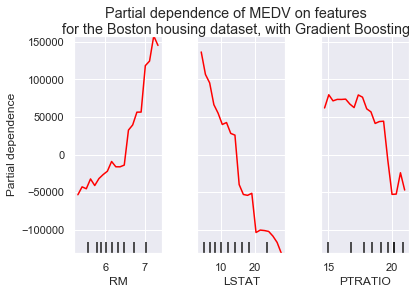

In [217]:

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt
features=['RM', 'LSTAT','PTRATIO']

plot_partial_dependence(reg, X_train, features,
                        n_jobs=-1, grid_resolution=20, line_kw={"c": "red"})

fig = plt.gcf()
fig.suptitle('Partial dependence of MEDV on features\n'
             'for the Boston housing dataset, with Gradient Boosting')

fig.subplots_adjust(wspace=0.4, hspace=0.3)





<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3>Predicting Selling Prices<a class="anchor-link" href="#Question-10---Predicting-Selling-Prices">¶</a>
</h3>
<p>To use this model to help price homes owned by your clients that they wish to sell. We have collected the following information from three of the clients:</p>
<table>
<thead>
<tr>
<th>Feature</th>
<th>Client 1</th>
<th>Client 2</th>
<th>Client 3</th>
</tr>
</thead>
<tbody>
<tr>
<td>Total number of rooms in home</td>
<td>5 rooms</td>
<td>4 rooms</td>
<td>8 rooms</td>
</tr>
<tr>
<td>Household net worth (income)</td>
<td>Top 34th percent</td>
<td>Bottom 45th percent</td>
<td>Top 7th percent</td>
</tr>
<tr>
<td>Student-teacher ratio of nearby schools</td>
<td>15-to-1</td>
<td>22-to-1</td>
<td>12-to-1</td>
</tr>
</tbody>
</table>



</div>
</div>

In [218]:
from sklearn.neighbors import NearestNeighbors

num_neighbors=5

import warnings
warnings.filterwarnings("ignore")
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    
neigh=NearestNeighbors(num_neighbors)
neigh.fit(X)
distance, indexes=neigh.kneighbors(client_data)

indx=[]
for indx,i in enumerate(indexes):
    val=np.mean(df.iloc[i]['MEDV'])
    
    print ("The predicted {} nearest neighbors price based on neighboring sell price for Client {}'s home is: ${:,.2f}".format(num_neighbors,indx+1, val))

Predicted selling price for Client 1's home: $320,467.43
Predicted selling price for Client 2's home: $299,182.93
Predicted selling price for Client 3's home: $892,233.81
The predicted 5 nearest neighbors price based on neighboring sell price for Client 1's home is: $315,840.00
The predicted 5 nearest neighbors price based on neighboring sell price for Client 2's home is: $280,980.00
The predicted 5 nearest neighbors price based on neighboring sell price for Client 3's home is: $808,920.00
